# Etude de la BD Cerema AWP #

La BD Cerema AWP a été créée dans le but de détecter et de localiser un piéton dans de bonnes conditions météorologiques comme dans des conditions météorologiques dégradées.

Lien vers l'article : https://hal.archives-ouvertes.fr/hal-01808744/document

In [26]:
import h5py
import numpy as np

# Lecture du fichier h5py
mon_fichier = h5py.File('/Users/rblin/Downloads/cerema0.25.hdf5', 'r')

# Affichage de la structure des dossiers dans le fichier hdf5
list_elmts = [key for key in mon_fichier['/'].keys()]
for key in list_elmts:
    print(key)
    print(type(mon_fichier['/'][key]))
    print(mon_fichier['/'][key])
    print([key for key in mon_fichier['/'][key].keys()])

# Accès aux dossiers et fichiers que l'on veut manipuler
mon_dataset_train = mon_fichier['train']
mon_dataset_test = mon_fichier['test']

# Nombre d'images de train et de test
print("Nombre d'images de train : ", len(mon_dataset_train["images"]))
print("Nombre d'images de test : ", len(mon_dataset_test["images"]))

# Exploration des labels
print("Format des bounding boxes : ", mon_dataset_train["boundingBox"][0].dtype, mon_dataset_train["boundingBox"][0].shape)
print("Dossier clothes : ", mon_dataset_train["clothes"][0].dtype) # Correspond aux 2 couleurs de manteaux
print("Dossier direction : ", mon_dataset_train["direction"][0].dtype) # Correspond aux 5 orientations possibles du piéton
print("Dossier exposition : ", mon_dataset_train["exposition"][0].dtype) # Correspond à l'heure d'exposition
print("Dossier images : ", mon_dataset_train["images"][0].dtype, mon_dataset_train["images"][0].shape)
print("Dossier pedestrian : ", mon_dataset_train["pedestrian"][0].dtype) # Correspond aux 5 personnes différentes qu'il peut y avoir
print("Dossier pedestrianClothes : ", mon_dataset_train["pedestrianClothes"][0].dtype) # Correspond à la combinaison des 5 personnes et des 2 manteaux
print("Dossier weather : ", mon_dataset_train["weather"][0].dtype) # Correspond aux combinaisons nuit/jour avec les 5 météo possibles

# 5 météo possibles : good weather, light rain, heavy rain, light fog, heavy fog

test
<class 'h5py._hl.group.Group'>
<HDF5 group "/test" (8 members)>
['boundingBox', 'clothes', 'direction', 'exposition', 'images', 'pedestrian', 'pedestrianClothes', 'weather']
train
<class 'h5py._hl.group.Group'>
<HDF5 group "/train" (8 members)>
['boundingBox', 'clothes', 'direction', 'exposition', 'images', 'pedestrian', 'pedestrianClothes', 'weather']
Nombre d'images de train :  43606
Nombre d'images de test :  7696
Format des bounding boxes :  float64 (4,)
Dossier clothes :  int64
Dossier direction :  int64
Dossier exposition :  float64
Dossier images :  uint8 (158, 256, 3)
Dossier pedestrian :  int64
Dossier pedestrianClothes :  int64
Dossier weather :  int64


<Figure size 432x288 with 0 Axes>

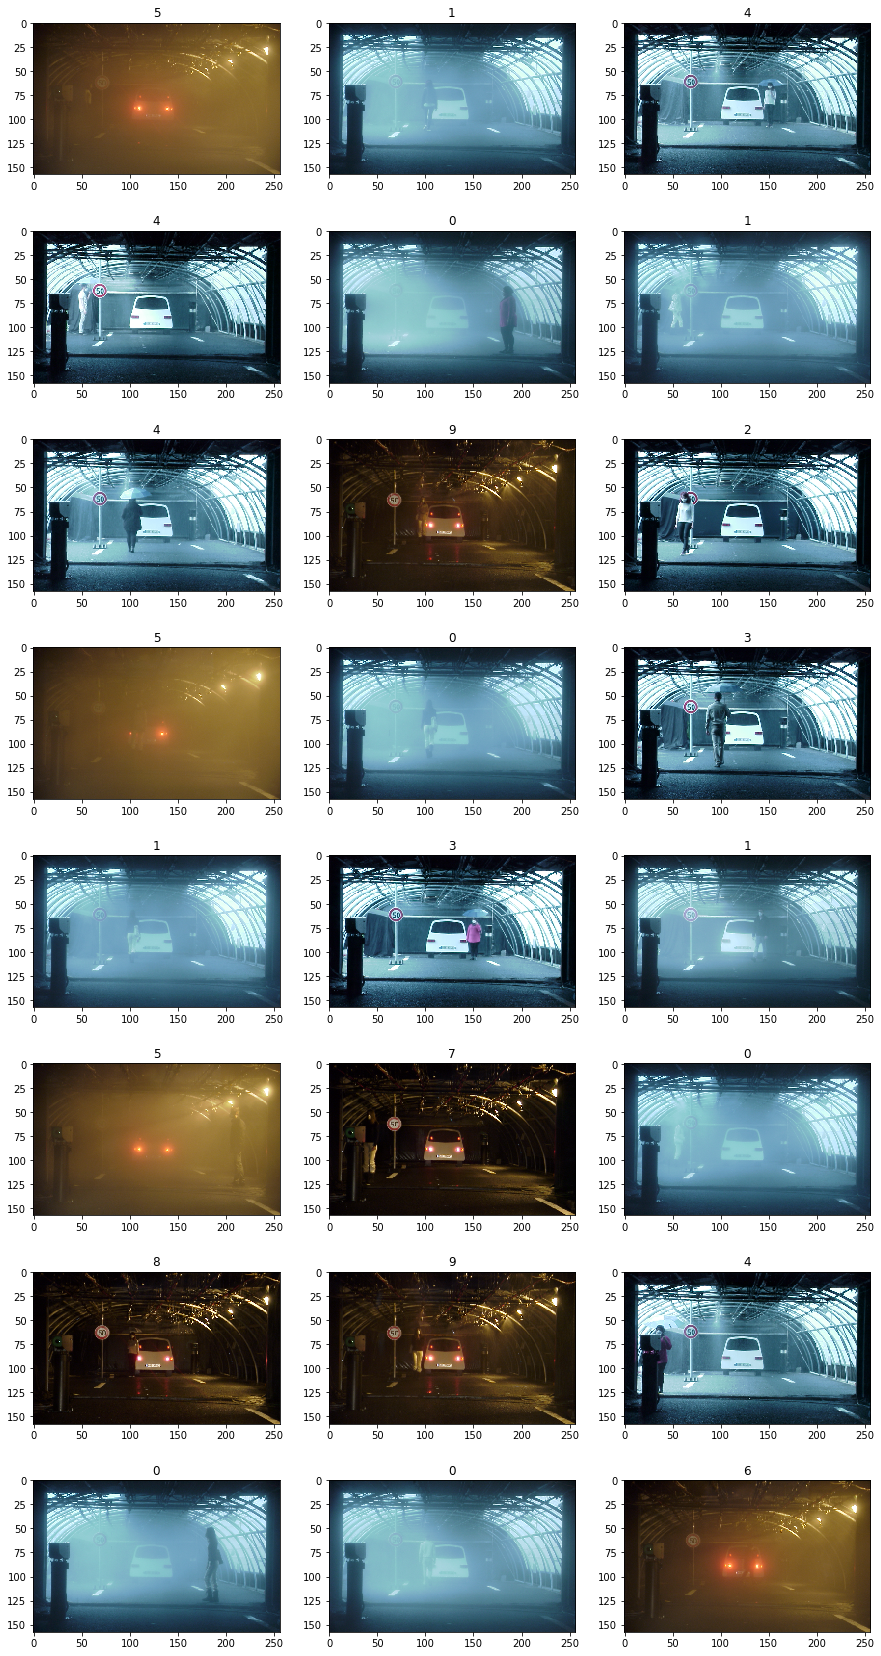

In [38]:
import pylab as pl
import random

# Affichage d'images de la BD train 
indexes = random.sample(range(0,len(mon_dataset_train["images"])),24)

pl.figure(1)
pl.figure(figsize=(15,30))
pl.clf()
for i in range(24) :
    pl.subplot(8,3,i+1)
    pl.imshow(mon_dataset_train["images"][indexes[i]])
    pl.title(mon_dataset_train["weather"][indexes[i]])

[0.58398438 0.3518225  0.0703125  0.35023772]


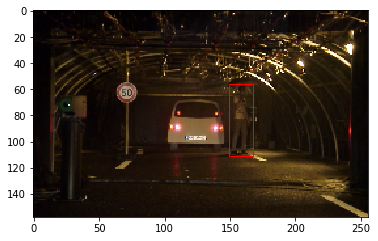

In [45]:
# Affichage de la bounding box d'un des piétons

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Format des bounding boxes : x, y, w, h

dimensions = mon_dataset_train["boundingBox"][0]
print(dimensions)
largeur = mon_dataset_train["images"][0].shape[1]
hauteur = mon_dataset_train["images"][0].shape[0]

# Tracé de la bounding box sur l'image 

x = dimensions[0] * largeur
y = dimensions[1] * hauteur
w = dimensions[2] * largeur
h = dimensions[3] * hauteur

im = mon_dataset_train["images"][0]
fig,ax = plt.subplots(1)
ax.imshow(im)
rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()